# Advertising Sales Channel Prediction Assignment

## Introduction

### Sales play a vital role in any business model. An increase in sales leads to increase in revenue of a busniess. How sales will increase. There are various method but the most effective one is advertisment. In this project i have tried to check through which mode of advirtsment (tv,newspaper,radio) sales increase.

In [7]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# preprocession, normalizing

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# models

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold,cross_val_score


# metrics

from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


In [8]:
# Reading the dataset

sale = pd.read_csv('Advertising.csv')
sale.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### from the above table we can find out that sales is the label and rest TV, Radio and Newspaper is the features.

In [9]:
sale.shape

(200, 5)

### There are all together 200 rows and 5 columns.

## EDA 

In [10]:
# lets find out is there any null values in all the cloumns

pd.set_option('display.max_rows',None)

sale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


### From the above table we can see that there is no null values in data set.

In [11]:
# removing the duplicates

sale.drop_duplicates(inplace = True)

### Used the duplicates command to remove any duplicates data from the datset if any.

In [12]:
sale.drop('Unnamed: 0', axis=1, inplace=True)

### Removed the unwanted columns from the datset that is unnamed.

In [13]:
sale.shape

(200, 4)

### After removing the duplicates data and unnamed columns we have 200 rows and 4 columns.

In [14]:
sale.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


### From the above dataset we can see that there are skewness in dataset. Moreover the min data for radio is showing zero that needs to rectify.

In [15]:
sale['radio'] = sale['radio'].replace(0,sale['radio'].mean())

### Replacing the zero data from radio columns and filling it with the help of mean.

In [16]:
sale.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.380320,30.554000,14.022500
std,85.854236,14.754473,21.778621,5.217457
min,0.700000,0.300000,0.300000,1.600000
25%,74.375000,10.075000,12.750000,10.375000
50%,149.750000,23.282000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


## scatter plot

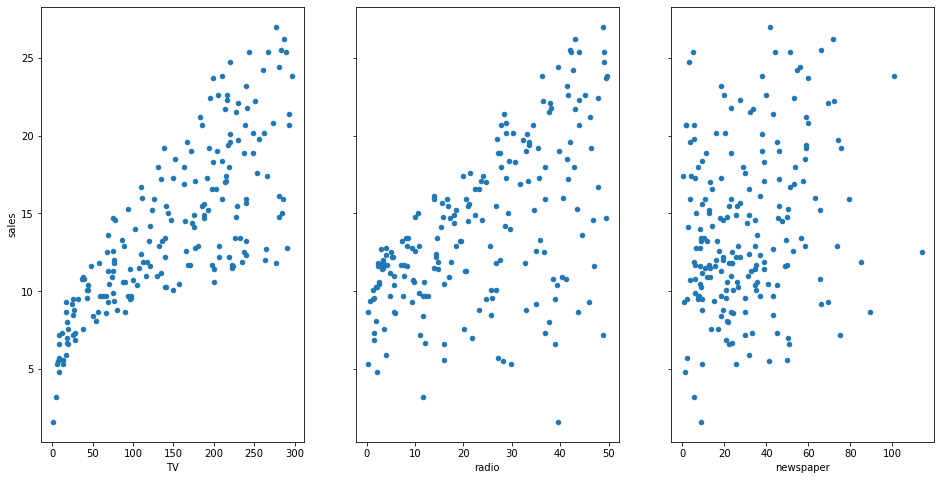

In [17]:
fig,axs = plt.subplots(1,3,sharey = True)
sale.plot(kind='scatter',x='TV',y='sales',ax=axs[0],figsize=(16,8))
sale.plot(kind='scatter',x='radio',y='sales',ax=axs[1])
sale.plot(kind='scatter',x='newspaper',y='sales',ax=axs[2])
fig.savefig('testdata.jpg')

### From the above scatter plot we can see that TV and radio are effective method for increasing the sales but newspaper is not good option for Advertisment

### Now we can see that there is no zero values data in the datset. Still we need to work on skewness.

## Distribution plot

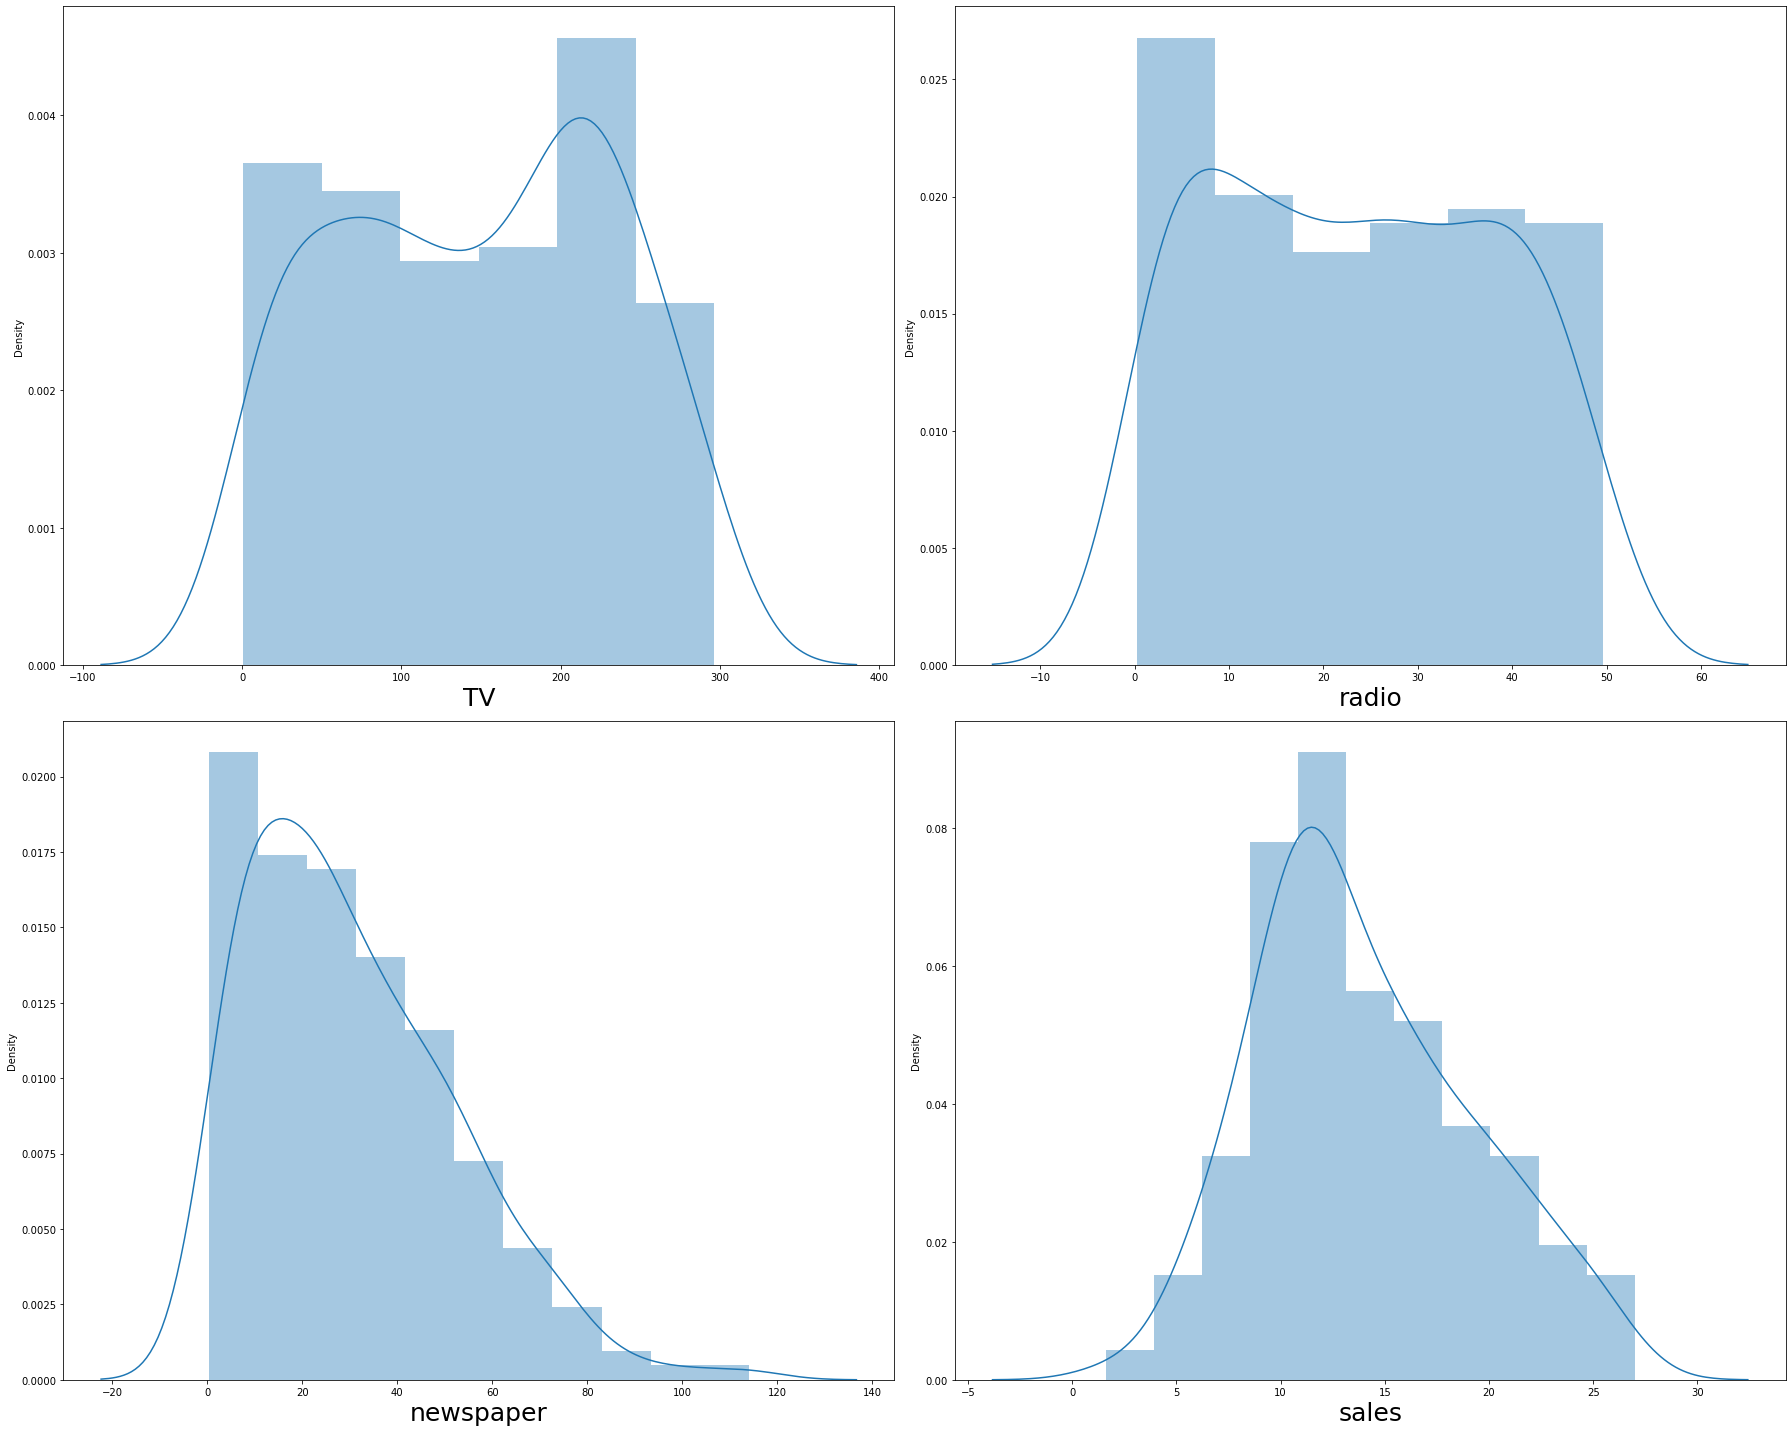

In [18]:
# removed the skewness

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in sale:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(sale[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

### With the help of distribution plot we can detect skewness from the dataset.

## Z score method

In [19]:
# finding out the z score
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(sale))
print(z)

[[9.69852266e-01 9.79761515e-01 1.77894547e+00 1.55205313e+00]
 [1.19737623e+00 1.08168072e+00 6.69578760e-01 6.96046111e-01]
 [1.51615499e+00 1.53012520e+00 1.78354865e+00 9.07405869e-01]
 [5.20496822e-02 1.21757298e+00 1.28640506e+00 8.60330287e-01]
 [3.94182198e-01 8.54784113e-01 1.28180188e+00 2.15683025e-01]
 [1.61540845e+00 1.73396361e+00 2.04592999e+00 1.31091086e+00]
 [1.04557682e+00 6.40030843e-01 3.24708413e-01 4.27042783e-01]
 [3.13436589e-01 2.56858131e-01 8.72486994e-01 1.58039455e-01]
 [1.61657614e+00 1.44591548e+00 1.36042422e+00 1.77205942e+00]
 [6.16042873e-01 1.41194241e+00 4.30581584e-01 6.57617064e-01]
 [9.45155670e-01 1.19451478e+00 2.92486143e-01 1.04190753e+00]
 [7.90028350e-01 4.21048605e-02 1.22232878e+00 6.48970529e-01]
 [1.43908760e+00 7.96306952e-01 1.62704048e+00 9.26620392e-01]
 [5.78501712e-01 1.07221174e+00 1.07502697e+00 8.30547775e-01]
 [6.66253447e-01 6.46825456e-01 7.11007392e-01 9.56402904e-01]
 [5.64664612e-01 1.65242824e+00 1.02862691e+00 1.609696

In [20]:
print(np.where(z > 3)[0])
print(np.where(z > 3)[1])

[ 16 101]
[2 2]


In [21]:
index = (np.where(z > 3)[0])

In [22]:
sale = sale.drop(sale.index[index])
sale.shape

(198, 4)

### After removing the skewness from the dataset we can see that there are 198 rows and 4 columns in the dataset.

In [23]:
# dividing features and label

x = sale.drop('sales',axis=1)
y = sale.sales

In [24]:
# standard scaler

scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)
x_scaled

array([[ 9.78697339e-01,  9.87717793e-01,  1.93299778e+00],
       [-1.19901165e+00,  1.08953250e+00,  7.51312752e-01],
       [-1.51933199e+00,  1.53751718e+00,  1.93790103e+00],
       [ 5.64563564e-02,  1.22528543e+00,  1.40834924e+00],
       [ 4.00243389e-01, -8.44946842e-01,  1.40344598e+00],
       [-1.61906543e+00,  1.74114659e+00,  2.21738670e+00],
       [-1.04647815e+00,  6.48335453e-01, -3.07790837e-01],
       [-3.10797368e-01, -2.47633924e-01, -8.91278462e-01],
       [-1.62023876e+00, -1.43547211e+00, -1.41102374e+00],
       [ 6.23176960e-01, -1.40153388e+00, -4.20565756e-01],
       [-9.45571378e-01, -1.18432918e+00, -2.73468035e-01],
       [ 7.98003813e-01,  5.10225353e-02, -1.26392602e+00],
       [-1.44189191e+00,  8.04451330e-01,  1.77119028e+00],
       [-5.77144318e-01, -1.06215154e+00, -1.10702179e+00],
       [ 6.73630347e-01,  6.55123100e-01,  7.95442068e-01],
       [ 5.71550238e-01,  1.65969483e+00,  1.13376683e+00],
       [ 1.58061798e+00,  1.10989544e+00

### VIF : variance inflation factor

In [25]:
# finding variance inflation factor(vif)

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.003449,TV
1,1.132216,radio
2,1.132617,newspaper


### From the above table we can say that no features are strongly related to each other as vif score is not more that 5 for any cloums. So there is no need to drop any columns. We are good to go for model prediction.

## Model Building

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 370)

## Linear Regression model

In [27]:
rg = LinearRegression()
rg.fit(x_train,y_train)

LinearRegression()

In [28]:
# adjusted r2 score
rg.score(x_train,y_train)

0.8867073043725643

In [29]:
rg.score(x_test,y_test)

0.9018690540874629

In [30]:
y_pred = rg.predict(x_test)

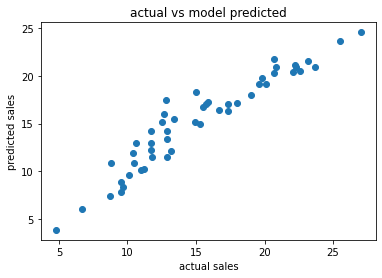

In [31]:
plt.scatter(y_test,y_pred)
plt.xlabel('actual sales')
plt.ylabel('predicted sales')
plt.title('actual vs model predicted')
plt.show()

### The above scatter plot shows the relationship between the actual sales and predicted sales.

### Linear Regression model - 90%

## Random Forest Regressor Model

In [32]:
rf = RandomForestRegressor(n_estimators=100,)
rf.fit(x_train,y_train)

RandomForestRegressor()

In [33]:
output = rf.predict(x_test)

In [34]:
from sklearn import metrics
r_square = metrics.r2_score(y_test,output)
r_square

0.9696616200973914

### Random Forest Regressor Model - 96.9%

## Decision Tree Regressor Model

In [76]:
dt = DecisionTreeRegressor(random_state = 200)
dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=200)

In [77]:
output1 = dt.predict(x_test)

In [78]:
from sklearn import metrics
r_square = metrics.r2_score(y_test,output1)
r_square

0.9565376812745509

### Decision Tree Regressor Model - 95.6%


# Conclusion

### According to the above 3 model prediction the best model is Random Forest Regressor Model -  96.9%

# Saving the models

In [6]:
import pickle

In [35]:
# saving the Random Forest Regressor Model

filename = 'finalized_model.pickle'
pickle.dump(rf,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))